In [3]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + TOPIC AND SENTIMENT INTENSITY + ECONOMIC INDEX - DATA COMPOSITION 4 (Fixed Set Test).csv')
df.head(5)

,Month,Tourist Arrival,Number of Posts,Number of Comments,NegativityQDAP,PositivityQDAP,TOPIC 1,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,TOPIC 7,TOPIC 8,TOPIC 9,TOPIC 10,CCI,PMI,REERI,Class
0,01/01/2008,399556,403,3049,0.181818,0.090909,0.008715,0.010894,0.889993,0.011228,0.010641,0.001710,0.014932,0.027566,0.014081,0.010241,98.4,53.3,109,Train
1,01/02/2008,411032,357,3211,0.000000,0.090909,0.009085,0.010974,0.007221,0.006829,0.006410,0.005451,0.011673,0.014948,0.913561,0.013848,90.8,53.0,108,Train
2,01/03/2008,414332,344,3153,0.142857,0.000000,0.008164,0.005849,0.006917,0.009097,0.007196,0.001611,0.007281,0.005533,0.014198,0.934153,89.5,53.4,106,Train
3,01/04/2008,395900,338,3184,0.214286,0.071429,0.007528,0.013789,0.005867,0.911020,0.012191,0.001259,0.014063,0.019446,0.006807,0.008030,82.6,56.4,106,Train
4,01/05/2008,366387,369,2964,0.000000,0.100000,0.008862,0.007257,0.010529,0.011619,0.014288,0.001458,0.015968,0.915464,0.010944,0.003609,79.8,57.2,106,Train


In [5]:
import datetime
df['Month'] = pd.to_datetime(df['Month'])
df['Month'] = df['Month'].dt.strftime('%d.%m.%Y')
df['Month'] = pd.DatetimeIndex(df['Month']).dayofyear

In [6]:
X=df.drop('Tourist Arrival', axis=1)
y=df['Tourist Arrival']

In [7]:
train = df[df["Class"] == "Train"]
validation = df[df["Class"] == "Validation"]
test = df[df["Class"] == "Test"]
print(train.shape)
print(validation.shape)
print(test.shape)

(133, 20)
(12, 20)
(41, 20)


In [8]:
train = train.drop(['Class'], axis=1)
validation = validation.drop(['Class'], axis=1)
test = test.drop(['Class'], axis=1)

In [9]:
target_column_train = ['Tourist Arrival']
predictors_train = list(set(list(train.columns))-set(target_column_train))

X_train = train[predictors_train].values
y_train = train[target_column_train].values

print(X_train.shape)
print(y_train.shape)

(133, 18)
(133, 1)


In [10]:
target_column_validation = ['Tourist Arrival'] 
predictors_validation = list(set(list(validation.columns))-set(target_column_validation))

X_validation = validation[predictors_validation].values
y_validation = validation[target_column_validation].values

print(X_validation.shape)
print(y_validation.shape)

(12, 18)
(12, 1)


In [11]:
target_column_test = ['Tourist Arrival'] 
predictors_test = list(set(list(test.columns))-set(target_column_test))

X_test = test[predictors_test].values
y_test = test[target_column_test].values

print(X_test.shape)
print(y_test.shape)

(41, 18)
(41, 1)


In [12]:
from sklearn import model_selection
from sklearn.svm import SVR
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics
from scipy import stats
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [13]:
svr_rbf = SVR(kernel='sigmoid', C=10, epsilon=0.05)
svr_rbf.fit(X_train, y_train) 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, epsilon=0.05, kernel='sigmoid')

In [14]:
params = {'C':[0.1, 1, 10, 100, 1000],
          'epsilon':[1, 0.1, 0.001, 0.0001, 0.00001]}

In [15]:
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)


In [16]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, estimator=SVR(C=10, epsilon=0.05, kernel='sigmoid'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [1, 0.1, 0.001, 0.0001, 1e-05]},
             return_train_score=True, scoring='r2', verbose=1)

In [17]:
grid.best_estimator_

SVR(C=1000, epsilon=1, kernel='sigmoid')

In [18]:
svr_best=SVR(kernel='sigmoid', C=1000, epsilon=1)
svr_best.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000, epsilon=1, kernel='sigmoid')

In [19]:
svr_best.score(X_validation,y_validation)


-34.07267345353092

In [20]:
y_pred=svr_best.predict(X_test)
print(y_pred)

[559330.70402056 558688.40599586 557882.77318783 558872.00298618
 557338.6892033  557312.83554625 556830.58772527 555971.33422317
 556953.30310028 558836.254556   559444.82865361 558119.0576825
 544124.72662977 544601.30721063 543962.76514835 543583.37027996
 543554.75183385 543583.84009178 543344.90795362 543617.09359332
 543715.94401284 543427.39477133 543439.86231648 544233.21539979
 545218.93786385 547592.65852987 551695.09748941 553257.72010008
 551921.39812747 553997.81621078 555196.81231022 555393.76265372
 557753.46752358 558202.82273394 557094.45575337 558712.5680002
 558547.34774525 559125.57781095 557725.18672349 556341.34270933
 555454.77652787]


In [21]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 633826.763662967


In [22]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 548573.4173300123


In [23]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 5.375857579525841e+20


In [24]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 4631.145465352506


In [25]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : inf


/var/folders/w4/3f8pkphx2j78qktgvt5lpdvw0000gn/T/ipykernel_3420/2542154612.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100


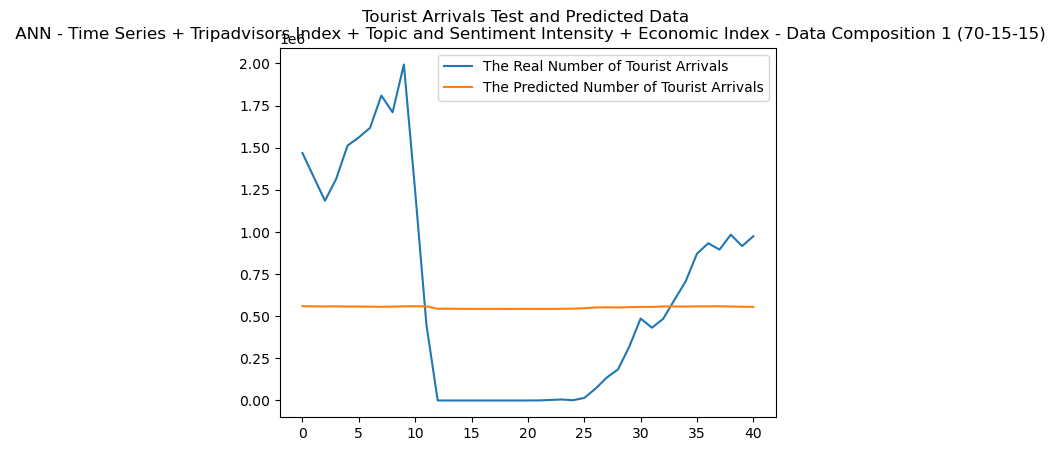

In [26]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n ANN - Time Series + Tripadvisors Index + Topic and Sentiment Intensity + Economic Index - Data Composition 1 (70-15-15)")
plt.legend()
plt.show()